# Amazon reviews stats

### Find out
### 1. Sentiment analysis of reviews table of database
### 2. Analysis Positive sentences
### 3. Analysis Negative sentences
### 4. Analyse, to what user Amazon can recommend more product?
### 5. Analyse lenght of comments where customers are going to give lengthy comments or shortly
### 6. Analysis the score 

# Data extraction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sqlite3

#### Read sqlite database

In [3]:
con = sqlite3.connect('C:/Users/lucas/general/cursos/09-python/01_data_analyst_python/05-amazon_stats/database.sqlite')

In [4]:
type(con)

sqlite3.Connection

In [5]:
data = pd.read_sql_query('SELECT * FROM Reviews', con)

In [7]:
data.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...

In [11]:
data.shape

(568454, 10)

In [12]:
pd.read_sql_query('SELECT * FROM Reviews LIMIT 3', con)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...

#### Read csv

In [ ]:
# pd.read_csv('C:/Users/lucas/general/cursos/09-python/01_data_analyst_python/05-amazon_stats/Reviews.csv')

# 1. Sentiment analysis of reviews table of database

In [13]:
# Analysis to Summary column

In [ ]:
#install Textblob
!pip install TextBlob

In [16]:
from textblob import TextBlob

In [18]:
text = data['Summary'][0]

In [19]:
TextBlob(text).sentiment.polarity

0.7

In [22]:
polarity=[]

for i in data['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.appendend(0)

In [21]:
len(polarity)

568454

In [23]:
data_copy = data.copy

In [24]:
data['Polarity'] = polarity

In [27]:
data.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

   Polarity  
0       0.7  
1       0.0  
2       0.0

# 2. Analysis Positive sentences

In [28]:
data_positive = data[data['Polarity']>0]

In [29]:
data_positive.shape

(331665, 11)

In [ ]:
!pip install wordcloud

In [31]:
from wordcloud import WordCloud, STOPWORDS

In [32]:
stop_words = set(STOPWORDS)

In [33]:
total_text = (' '.join(data_positive['Summary']))

In [34]:
len(total_text)

8465012

In [37]:
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [39]:
import re
total_text = re.sub('[^a-zA-Z]', ' ', total_text) #remove special characters

In [40]:
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [41]:
total_text = re.sub(' +', ' ', total_text) #remove spaces

In [42]:
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

(-0.5, 999.5, 499.5, -0.5)

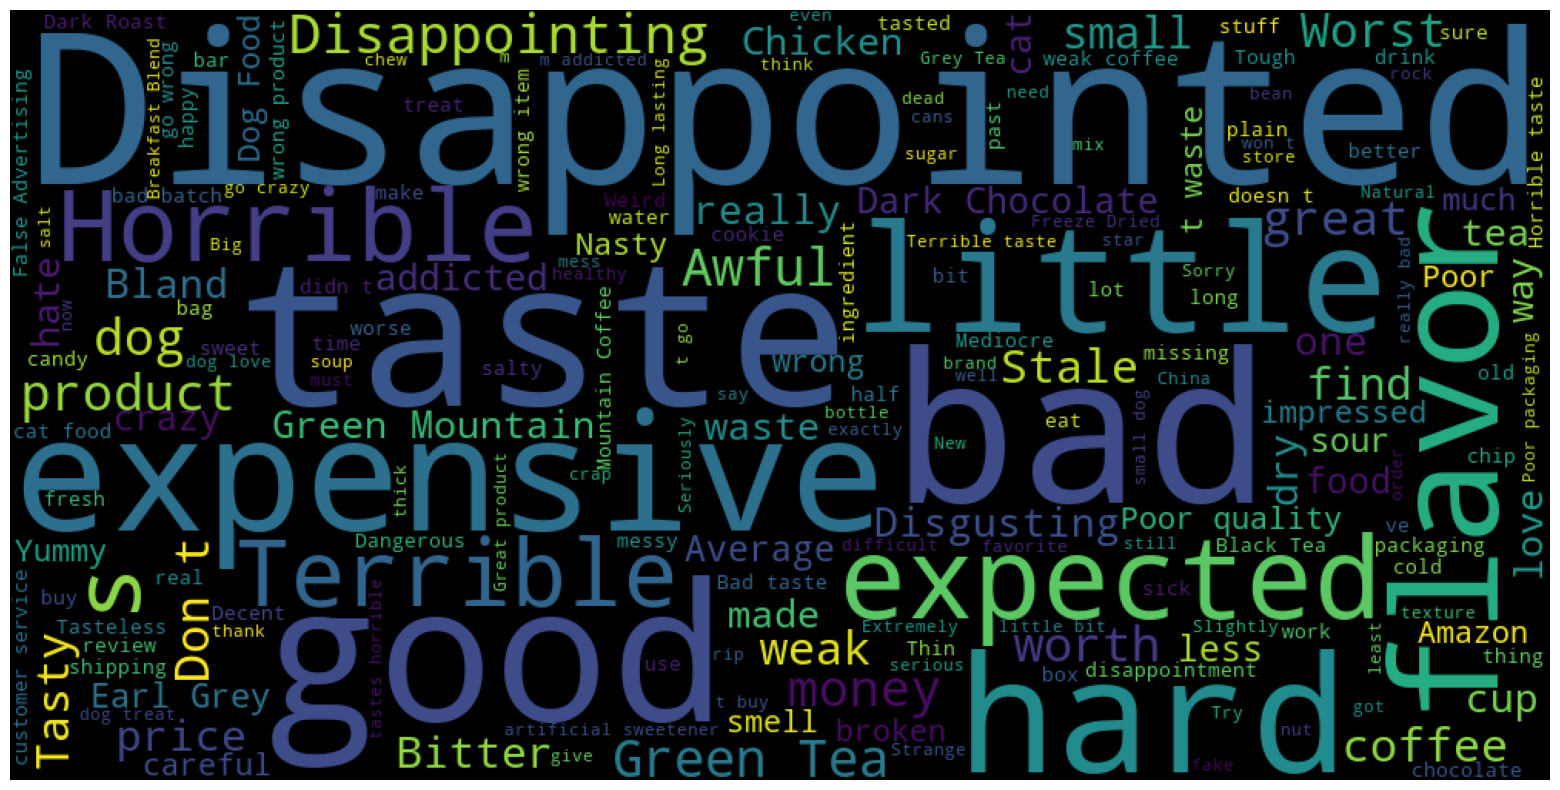

In [66]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stop_words).generate(total_text)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis('off')

# 3. Analysis Negative sentences

In [47]:
data_negative = data[data['Polarity']<0]

In [48]:
data_negative.shape

(52516, 11)

In [52]:
total_text2 = (' '.join(data_negative['Summary']))
total_text2 = re.sub('[^a-zA-Z]', ' ', total_text2)
total_text2 = re.sub(' +', ' ', total_text2)

(-0.5, 999.5, 499.5, -0.5)

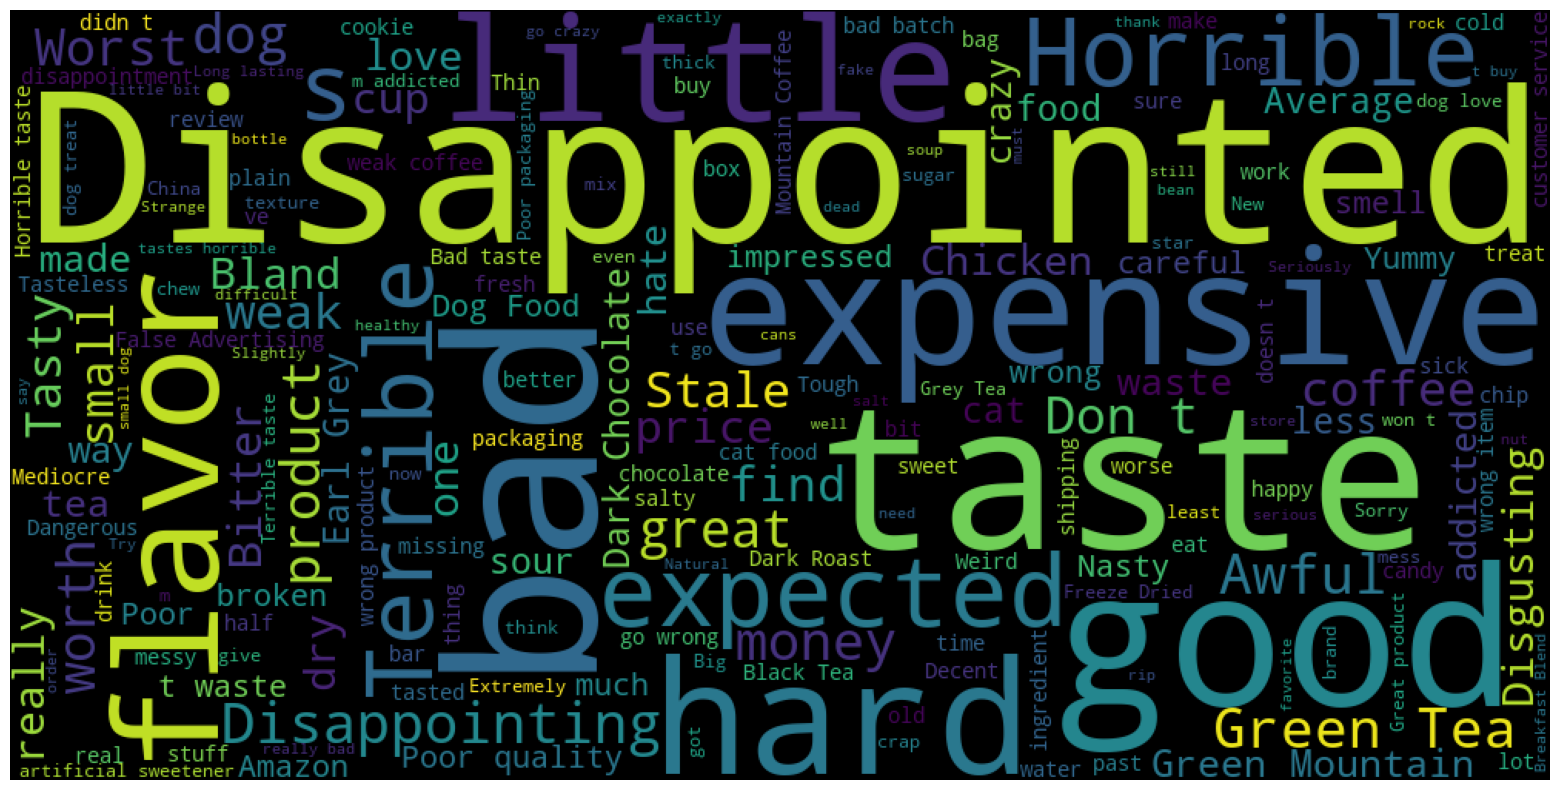

In [53]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stop_words).generate(total_text)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis('off')

# 4. Analyse, to what user Amazon can recommend more product?

In [54]:
data.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

   Polarity  
0       0.7  
1       0.0  
2       0.0

In [55]:
data['UserId'].nunique()

256059

In [59]:
raw = data.groupby('UserId').agg({'Summary':'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'}).sort_values(by='Text', ascending=False)

In [60]:
raw.head(3)

Summary  Text     Score  ProductId
UserId                                            
A3OXHLG6DIBRW8      448   448  4.535714        448
A1YUL9PCJR3JTY      421   421  4.494062        421
AY12DBB0U420B       389   389  4.647815        389

In [61]:
raw.columns=['Number_of_summaries', 'num_text', 'AVG_score', 'no_of_products_pruchase']
raw

Number_of_summaries  num_text  AVG_score  \
UserId                                                     
A3OXHLG6DIBRW8                  448       448   4.535714   
A1YUL9PCJR3JTY                  421       421   4.494062   
AY12DBB0U420B                   389       389   4.647815   
A281NPSIMI1C2R                  365       365   4.841096   
A1Z54EM24Y40LL                  256       256   4.453125   
...                             ...       ...        ...   
A2HROKQO0GA5AF                    1         1   3.000000   
A2HROR28DMJV2W                    1         1   5.000000   
A2HRR8CO2Y20G8                    1         1   5.000000   
A2HRSML93IK9TR                    1         1   5.000000   
AZZZOVIBXHGDR                     1         1   2.000000   

                no_of_products_pruchase  
UserId                                   
A3OXHLG6DIBRW8                      448  
A1YUL9PCJR3JTY                      421  
AY12DBB0U420B                       389  
A281NPSIMI1C2R                      365  
A1Z54EM24Y40LL                      256  
...                                 ...  
A2HROKQO0GA5AF                        1  
A2HROR28DMJV2W                        1  
A2HRR8CO2Y20G8                        1  
A2HRSML93IK9TR                        1  
AZZZOVIBXHGDR                         1  

[256059 rows x 4 columns]

In [63]:
user_ten = raw.index[0:10]
number_ten = raw['no_of_products_pruchase'][0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'A3OXHLG6DIBRW8'),
  Text(1, 0, 'A1YUL9PCJR3JTY'),
  Text(2, 0, 'AY12DBB0U420B'),
  Text(3, 0, 'A281NPSIMI1C2R'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A1TMAVN4CEM8U8'),
  Text(6, 0, 'A2MUGFV2TDQ47K'),
  Text(7, 0, 'A3TVZM3ZIXG8YW'),
  Text(8, 0, 'A3PJZ8TU8FDQ1K'),
  Text(9, 0, 'AQQLWCMRNDFGI')])

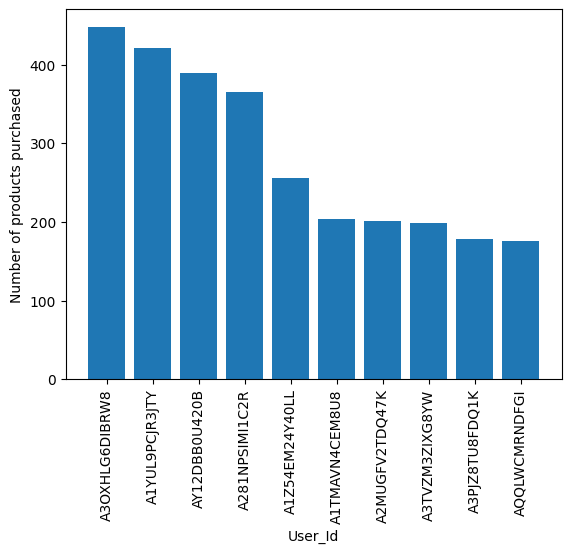

In [64]:
plt.bar(user_ten, number_ten, label='Most recommended users')
plt.xlabel('User_Id')
plt.ylabel('Number of products purchased')
plt.xticks(rotation='vertical')

# 5. Analyse lenght of comments where customers are going to give lengthy comments or shortly

In [69]:
final = data[0:2000]

In [70]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Polarity                  0
dtype: int64

In [71]:
final.duplicated().sum()

0

In [73]:
len(final['Text'][0].split(' '))

49

In [74]:
def calc_len(text):
    return len(text.split(' '))

In [77]:
final['Text_length'] = final['Text'].apply(calc_len)

C:\Users\lucas\AppData\Local\Temp\ipykernel_6556\121471045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_length'] = final['Text'].apply(calc_len)


In [76]:
import plotly.express as px

In [78]:
px.box(final, y='Text_length')

# 6. Analysis the score

<Axes: xlabel='Score', ylabel='count'>

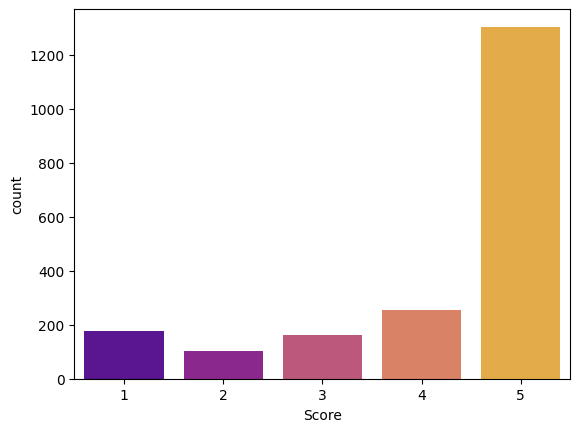

In [81]:
sns.countplot(data=final ,x=final['Score'] ,palette="plasma")